# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import scipy
import statsmodels.formula.api as smf
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [4]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: It has a larger range

#### Question 4. Drop data points with missing data


In [5]:
df_raw2 = df_raw.dropna()
df_raw2.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Rename the dataframe without NaNs and count the number of NaNs

In [7]:
np.isnan(df_raw2).sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 6. Create box plots for GRE and GPA

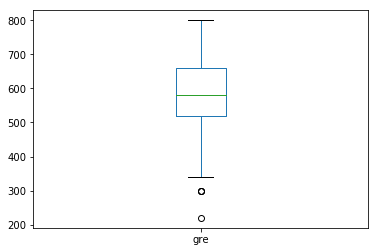

In [8]:
#boxplot 1
df_raw2['gre'].plot(kind='box')

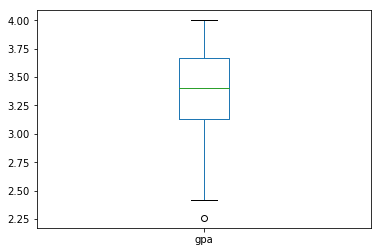

In [12]:
#boxplot 2 
df_raw2['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: The box represents Q1 and Q3. The line within the box is the median. The top cross line represents the maximum and the bottom dot represents the the minimum. The bottom cross line is Q1 - 1.5 * IQR. The bottom dot is an outlier here.

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118c78050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1191d4c50>]], dtype=object)

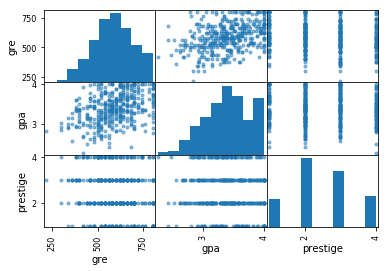

In [9]:
# plot the distribution of each variable 
pd.scatter_matrix(df_raw2[['gre','gpa','prestige']])

In [21]:
scipy.stats.skew(df_raw2[['gre','gpa','prestige']])

array([-0.14549459, -0.21606859,  0.08617836])

In [22]:
scipy.stats.kurtosis(df_raw2[['gre','gpa','prestige']])

array([-0.34376224, -0.5715724 , -0.90480519])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: I think so. GPA is slight negatively skewed and prestige has a negative kurtosis, but they are still in the range of what could be considered a normal distribution.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: We may want to adjust the ranges of the factors to be standardized so we can identify which factor is the strongest.

#### Question 11. Which of our variables are potentially colinear? 

In [23]:
# create a correlation matrix for the data
df_raw2.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: No two variables are strongly colinear.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:
1. We've already removed nulls
2. Determined the factors are normally distributed
3. We may want to remove the outlier we identified
4. We've determined there is no collinearity
5. We may want to standardize the range of the factors
6. Run the logistic regression with P(admit=1) = a + b*GRE
    1. Add GPA and Prestige to the model as covariates

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import grid_search, cross_validation
from sklearn.preprocessing import StandardScaler
x = df_raw2[['gre']]
sc = StandardScaler()
scaled_feature = sc.fit_transform(x)
gs1 = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(df_raw2), n_folds=10),
    scoring='accuracy'
)

gs1.fit(scaled_feature, df_raw2.admit)
gs1.grid_scores_

/Users/Shaan/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/Shaan/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/Shaan/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/Shaan/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a n

[mean: 0.67254, std: 0.07509, params: {'C': 1, 'class_weight': None},
 mean: 0.57935, std: 0.03925, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.67254, std: 0.07509, params: {'C': 2, 'class_weight': None},
 mean: 0.57935, std: 0.03925, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.67254, std: 0.07509, params: {'C': 3, 'class_weight': None},
 mean: 0.57935, std: 0.03925, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.67254, std: 0.07509, params: {'C': 4, 'class_weight': None},
 mean: 0.57935, std: 0.03925, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.67254, std: 0.07509, params: {'C': 5, 'class_weight': None},
 mean: 0.57935, std: 0.03925, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.67254, std: 0.07509, params: {'C': 6, 'class_weight': None},
 mean: 0.57935, std: 0.03925, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.67254, std: 0.07509, params: {'C': 7, 'class_weight': None},
 mean: 0.57935, std: 0.03925, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import grid_search, cross_validation
from sklearn.preprocessing import StandardScaler
x = df_raw2[['gre', 'gpa', 'prestige']]
sc = StandardScaler()
scaled_feature = sc.fit_transform(x)
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(df_raw2), n_folds=10),
    scoring='accuracy'
)

gs.fit(scaled_feature, df_raw2.admit)
gs.grid_scores_

/Users/Shaan/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/Shaan/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/Shaan/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/Shaan/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a n

[mean: 0.71285, std: 0.06156, params: {'C': 1, 'class_weight': None},
 mean: 0.62972, std: 0.07491, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.71285, std: 0.06156, params: {'C': 2, 'class_weight': None},
 mean: 0.62972, std: 0.07491, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.71285, std: 0.06156, params: {'C': 3, 'class_weight': None},
 mean: 0.62972, std: 0.07491, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.71285, std: 0.06156, params: {'C': 4, 'class_weight': None},
 mean: 0.62972, std: 0.07491, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.71285, std: 0.06156, params: {'C': 5, 'class_weight': None},
 mean: 0.62972, std: 0.07491, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.71285, std: 0.06156, params: {'C': 6, 'class_weight': None},
 mean: 0.62972, std: 0.07491, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.71285, std: 0.06156, params: {'C': 7, 'class_weight': None},
 mean: 0.62972, std: 0.07491, params: {'C': 7, 'class_weight': 'auto'},
 mean:

#### Question 14. What is your hypothesis? 

Answer: Students with a higher GRE are more likely to be admitted to grad school

In [58]:
print gs1.best_score_
print gs1.best_estimator_.coef_

0.672544080605
[[ 0.3989863]]


In [22]:
print gs.best_score_
print gs.best_estimator_.coef_

0.712846347607
[[ 0.25650188  0.28137399 -0.51957901]]


In [25]:
print gs.fit

<bound method GridSearchCV.fit of GridSearchCV(cv=sklearn.cross_validation.KFold(n=397, n_folds=10, shuffle=False, random_state=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'class_weight': [None, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)>


## Knowledge Review Questions

1. What is test error and train error?
2. What are ways to mitigate a situation where you have low train error but high test error?
3. What are some of the parameters you can tweak to get a better fit in ordinary linear regression?
4. What package would you use to explore these parameters easily and find the best model?
5. What is the difference between Lasso and Ridge regression?
    1. When do you use which?
6. Bonus: Explore alternatives to dropping obervations with missing data

Advanced Bonus:
1. What makes Lasso regression do what it does to the coefficients?
2. How do you deal with multi-colinearity when performing linear regression?
3. What is the "distance" formula in KNN? I.e. how does KNN account for distance to the k neighbours when predicting the class?

ANSWERS

1. Train error is the error in the prediction when it is run on the same data it was trained on. Test error is the error in the prediction when it is run on data it has not been trained on.
2. You probably have overfit here, so both regularization and cross-validation can be used to reduce this bias
3. You can reduce the penalty factor use in regularization, but this only reduced train error
4. Seaborn
5. Lasso minimizes the absolute value of the betas whereas Ridge minimizes the square of the betas
    1. You would use Lasso if you want a simple model (fewer features) at the expense of a better fit. You would use Ridge when you want the best fit
6. You could fill the missing data with the mean of the array